In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Introduction to Regression with Neural Networks in Tensorflow
Predicting a numerical variable based on some other combination of variables, basically predicting a number.

In [2]:
print(tf.__version__)

2.17.1


# Create data to view and fit

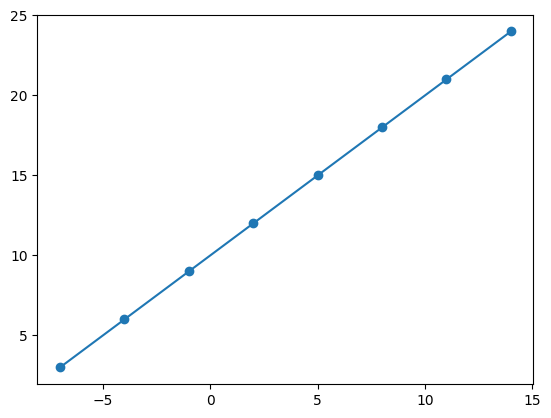

In [3]:
X = np.array([-7,-4,-1,2,5,8,11,14])
y = np.array([3,6,9,12,15,18,21,24])
plt.scatter(X,y)
plt.plot(X,y)
plt.show()

In [4]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and Output shapes

In [5]:
#create a demo tensor for house prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

#model.fit():-
* old:-model.fit(X,y,epochs=5) ->wont work
* new:-model.fit(tf.expand_dims(X,-1),y,epochs=5) ->new syntax

In [6]:
#or do
#model = tf.keras.Squential()
#model.add(tf.keras.layers.Dense(1,input_shpae = (3,)))

# Steps in modelling with TF
1. **Creating a model**:- define input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**:- define the loss function (in other words tells how wrong our model is).
3. **Optimizer**:-tells our model how to improve the patterns its learning and evalutation metrics (what we can use to interpret the performance of our model)
4. **Fitting the model**-letting the model try and find patterns b/w X and y (features and label).


In [7]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model using Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#2.Compile the model
model.compile(loss = tf.keras.losses.mae,#mean absolute error :- loss = mean(absolute(true-predicted value))
              optimizer = tf.keras.optimizers.SGD(),#Stochastic gradient descent  -
              metrics = ["mae"]
              )

#3.Fit the model:-
model.fit(tf.expand_dims(X,-1),y,epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - loss: 19.3962 - mae: 19.3962
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 19.1150 - mae: 19.1150
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.8337 - mae: 18.8337
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 18.5525 - mae: 18.5525
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.2712 - mae: 18.2712


In [8]:
model.predict(tf.reshape([17],shape = (1,1))) #wrong output way off

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[-17.021084]], dtype=float32)

# Improving our model
We can improve our model by alltering the steps we took to create a model.
* 1.**Creating the model**:- might add more layers,increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* 2.**Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
* 3.**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).
1. Add more layers
2. Increase the no of hidden units
3. change of activation fn
4. change of optimization fn(SGD() OR Adam())
5. change of learning rate (0.001 or 0.01)**[Most important]**
6. No of epochs
* These are hyperparameters

In [9]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model using Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#2.Compile the model
model.compile(loss = tf.keras.losses.mae,#mean absolute error :- loss = mean(absolute(true-predicted value))
              optimizer = tf.keras.optimizers.SGD(),#Stochastic gradient descent  -
              metrics = ["mae"]
              )

#3.Fit the model:-
model.fit(tf.expand_dims(X,-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - loss: 13.1794 - mae: 13.1794
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.0469 - mae: 13.0469
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.9144 - mae: 12.9144
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.7819 - mae: 12.7819
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 12.6494 - mae: 12.6494
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.5169 - mae: 12.5169
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.3844 - mae: 12.3844
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.2519 - mae: 12.2519
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.1194 - mae: 12.1194
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.9869 - mae: 11.9869
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.8544 - mae: 11.8544
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.7219 - mae: 11.7219
Epoch 13/100
1/1 ━━━━━━━

In [10]:
model.predict(tf.reshape([17],shape = (1,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[29.792278]], dtype=float32)

In [11]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model using Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])


#2.Compile the model
model.compile(loss = tf.keras.losses.mae,#mean absolute error :- loss = mean(absolute(true-predicted value))
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ["mae"]
              )

#3.Fit the model:-
model.fit(tf.expand_dims(X,-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step - loss: 13.5179 - mae: 13.5179
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.5093 - mae: 13.5093
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.5008 - mae: 13.5008
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.4922 - mae: 13.4922
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.4837 - mae: 13.4837
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.4752 - mae: 13.4752
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.4666 - mae: 13.4666
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.4581 - mae: 13.4581
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.4495 - mae: 13.4495
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.4410 - mae: 13.4410
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.4324 - mae: 13.4324
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 13.4239 - mae: 13.4239
Epoch 13/100
1/1 ━━━━━━━

In [12]:
model.predict(tf.reshape([17],shape = (1,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[2.4331255]], dtype=float32)

In [13]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model using Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1)
])


#2.Compile the model
model.compile(loss = tf.keras.losses.mae,#mean absolute error :- loss = mean(absolute(true-predicted value))
              optimizer = tf.keras.optimizers.SGD(),#Stochastic gradient descent  -
              metrics = ["mae"]
              )

#3.Fit the model:-
model.fit(tf.expand_dims(X,-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - loss: 13.6734 - mae: 13.6734
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.0976 - mae: 13.0976
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.5424 - mae: 12.5424
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.9791 - mae: 11.9791
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.4009 - mae: 11.4009
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.8088 - mae: 10.8088
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 10.2018 - mae: 10.2018
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.5695 - mae: 9.5695
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.9002 - mae: 8.9002
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.2037 - mae: 8.2037
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.4782 - mae: 7.4782
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.6986 - mae: 6.6986
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [14]:
model.predict(tf.reshape([17],shape = (1,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[32.878674]], dtype=float32)

Best model

In [15]:
#Set random seed
tf.random.set_seed(42)

#1.Create a model using Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = None),
    tf.keras.layers.Dense(1)
])


#2.Compile the model
model.compile(loss = "mae",#mean absolute error :- loss = mean(absolute(true-predicted value))
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"]
              )

#3.Fit the model:-
model.fit(tf.expand_dims(X,-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.6053 - mae: 11.6053
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.6445 - mae: 10.6445
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.6698 - mae: 9.6698
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.6704 - mae: 8.6704
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.6380 - mae: 7.6380
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 7.0104 - mae: 7.0104
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.4343 - mae: 7.4343
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.8333 - mae: 7.8333
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.9247 - mae: 7.9247
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.6786 - mae: 7.6786
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 7.2771 - mae: 7.2771
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 6.9338 - mae: 6.9338
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/s

In [16]:
model.predict(tf.reshape([17],shape = (1,1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[27.703682]], dtype=float32)

# Evaluating the model
steps for building NN :-


*   Build a model-> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it-> tweak the model -> fit it -> eval it ......
*  do it till max accuracy is achieved
*  when evaluating :- visualise visualise visualise






What to visualise:-
1. the data :- how's data how does it look like.
2. the model itself
3. training of a model
4. prediction of model:- prediction vs actual data

In [17]:
#Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

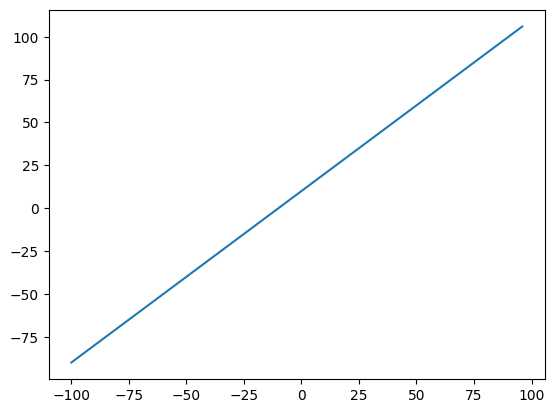

In [19]:
# Visualise data
plt.plot(X,y)

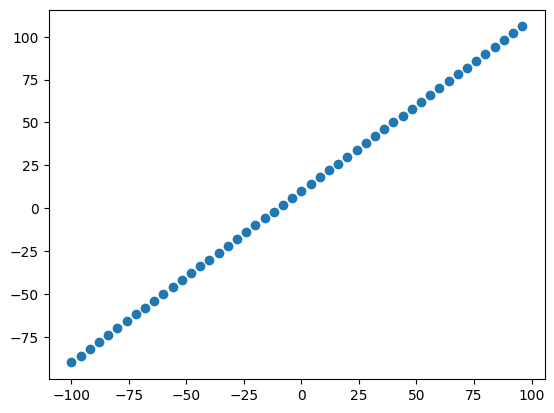

In [20]:
plt.scatter(X,y)

3 sets of data:-
1. Training data:- 70-80%  of original data
2. Validation set :- 10-15% data for hypertuning of model
3. Test set - model gets evaluating and 10-15% of data

In [21]:
#length of data
len(X)

50

In [22]:
#split data in
X_train = X[:40] #(80 % of data)
X_test = X[40:]  # 20 % of data
y_train = y[:40]
y_test = y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

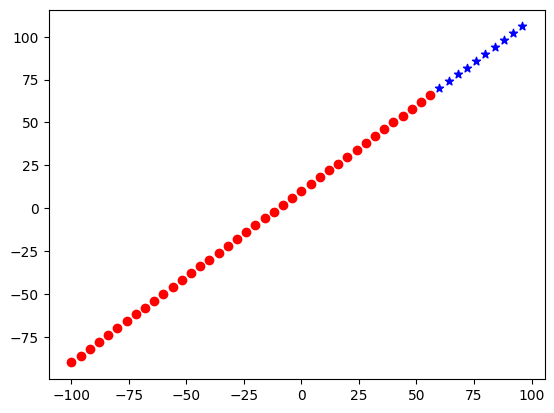

In [23]:
plt.scatter(X_train,y_train,marker = "o",color = "red")
plt.scatter(X_test,y_test,marker = "*",color = "blue")

In [24]:
#NN for our data
#1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3,input_shape = [1],name ="input_layer"),
    tf.keras.layers.Dense(1,name = "output_layer")
    ],name = "model_1")
#2.compile it
model.compile(loss = "mae",                           #mean absolute error :- loss = mean(absolute(true-predicted value))
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )
#3.fit it
model.fit(tf.expand_dims(X_train,axis = -1),y_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7702 - mae: 9.7702  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.5026 - mae: 12.5026 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.1119 - mae: 14.1119 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.2321 - mae: 13.2321 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.8319 - mae: 15.8319 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.3117 - mae: 9.3117 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2808 - mae: 10.2808
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.2925 - mae: 11.2925 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3558 - mae: 12.3558 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.7733 - mae: 13.7733 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.8532 - mae: 12.8532 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.0085 - mae: 15.0085 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

### Visualise the model

In [25]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Trainable params:- no of neurons * 2 (no written in layers of model)

In [26]:
model.fit(tf.expand_dims(X_train,axis = -1),y_train,epochs = 100,verbose = 0)

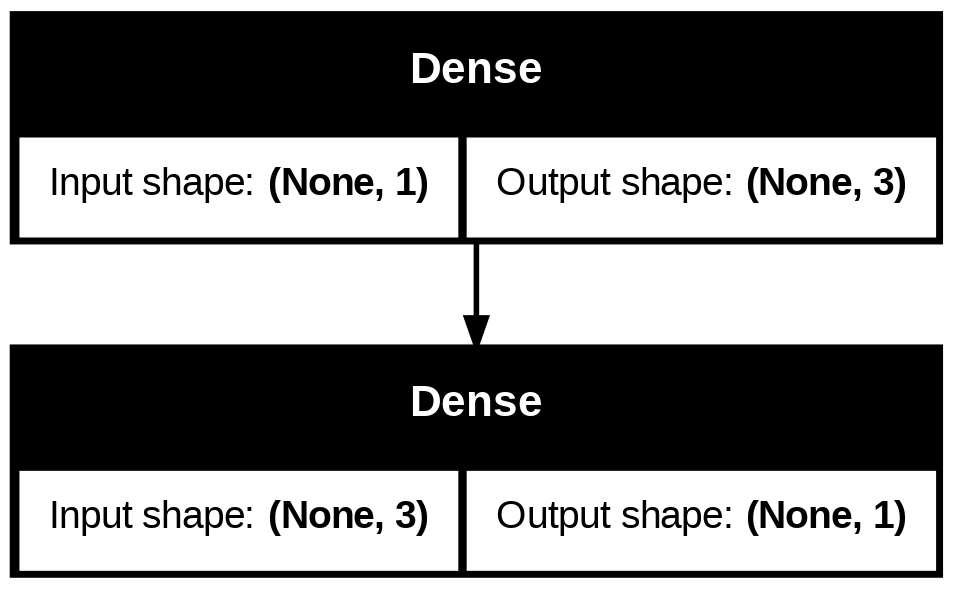

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True)

In [28]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

##visualising model prediction
To visualise prediction its a good idea to plot it against data(y_test)
* y_pred vs y_test

In [29]:
y_pred = model.predict(tf.expand_dims(X_test,axis = -1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[38.37428 ],
       [40.710724],
       [43.047173],
       [45.383614],
       [47.72006 ],
       [50.056503],
       [52.392952],
       [54.729393],
       [57.06584 ],
       [59.40229 ]], dtype=float32)

In [30]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [31]:
import seaborn as sns
def plot_pred(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              pred = y_pred):
  #plot training data in blue
  plt.figure(figsize = (10,7))
  plt.scatter(train_data,train_labels,c = "b",label = "training data")
  #plot test data in green
  plt.scatter(test_data,test_labels,c = "g",label = "testing data")
  #plot prediction data in red
  plt.scatter(test_data,pred,c = "r",label = "predictions")
  plt.show()

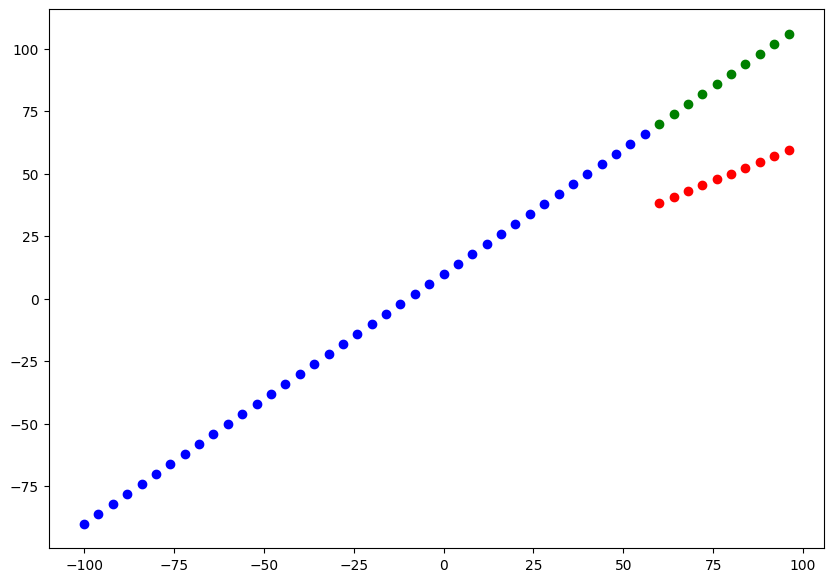

In [32]:
plot_pred()

### Evaluating our model's predictions with regression evaluation metrics
Depending on the problem you're working on, select your evaluation metrics:-
* For regression there are 2 of main metrics :-
1. MAE :- mean absolute error, "on average" ,how wrong is each of model prediction.(Starter for any regression problem)
-> tf.keras.losses.mae()
2. MSE:- mean squared error ,"Square the average errors".(When larger errors are more significant than smaller errors)
->tf.keras.losses.mse()
3. HUBER:- combination of MAE and MSE. Less sensitive too outliers than MSE. ->
tf.keras.losses.Huber()


In [33]:
model.evaluate(X_test,y_test) #returns loss and metric values (same here coz both are same)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 39.1117 - mae: 39.1117


[39.111717224121094, 39.111717224121094]

In [34]:
#Calculate the mean absolute error
error = tf.losses.mae(y_test,y_pred)
s,n=0,0
for i in error:
  s = s + i
  n = n+1
s/n

<tf.Tensor: shape=(), dtype=float32, numpy=39.111717>

In [35]:
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test,y_pred)
mae.result()

<tf.Tensor: shape=(), dtype=float32, numpy=39.111717>

In [36]:
#Mean squared error
e = tf.losses.mse(y_test,y_pred)
s1,n1 = 0,0
for i in e:
  s1 = s1+i
  n1 = n1+1
s1/n1

<tf.Tensor: shape=(), dtype=float32, numpy=1552.5577>

In [37]:
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test,y_pred)
mse.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1552.5575>

In [38]:
def mae(y_test,y_pred):
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_test,y_pred)
  return mae.result()
def mse(y_test,y_pred):
  mse = tf.keras.metrics.MeanSquaredError()
  mse.update_state(y_test,y_pred)
  return mse.result()

### Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.
* Again, there are many different ways you can do this, but 3 of the main ones are:
1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 dense layers, trained for 100 epochs.
3. model_3 - 2 dense layers, trained for 500 epochs.

# model_1

In [39]:
#Set Random seed:-
tf.random.set_seed(42)
#1.create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
], name = "model1")
#2.Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
#3.fit the model
model.fit(tf.expand_dims(X_train,-1),y_train,epochs = 100,verbose = 0)

In [40]:
y_pred1 = model1.predict(tf.expand_dims(X_test,axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


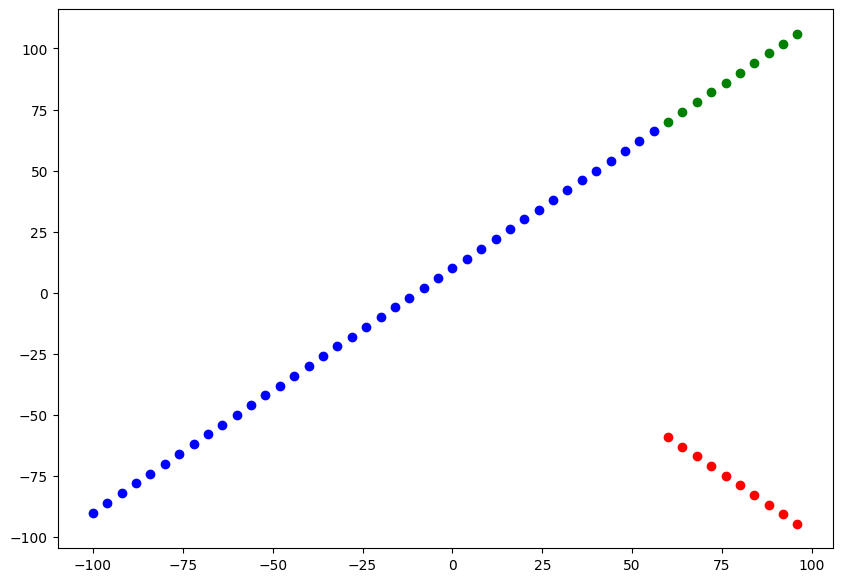

In [41]:
#plot predictions for plot 1
plot_pred(pred = y_pred1)

In [42]:
#calculate model_1 eval metrics
mae_1 = mae(y_test,y_pred1)
mse_1 = mse(y_test,y_pred1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=164.8378>,
 <tf.Tensor: shape=(), dtype=float32, numpy=27691.662>)

# Model_2


In [43]:
#set seed
tf.random.set_seed(42)
#1. create a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),   #->arbitary no
    tf.keras.layers.Dense(1),
]
)
#2.Compile it
model2.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mse"]
)
#3. fit it
model2.fit(tf.expand_dims(X_train,-1),y_train,epochs = 100,verbose = 0)

In [44]:
pred2 = model2.predict(tf.expand_dims(X_test,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


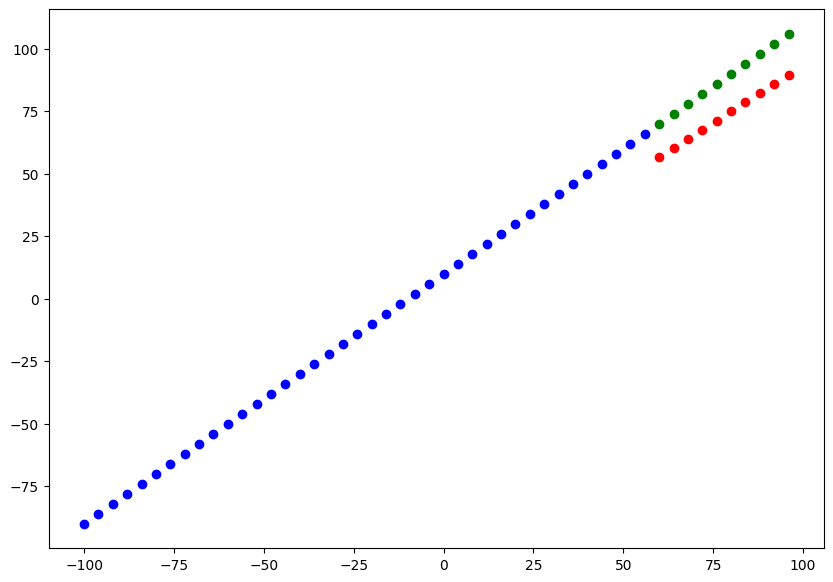

In [45]:
plot_pred(pred = pred2)

In [46]:
mae2 = mae(y_test,pred2)
mse2 = mse(y_test,pred2)
mae2,mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=14.889933>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.80168>)

Model3

In [47]:
#set seed
tf.random.set_seed(42)
#1. create a model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),   #->arbitary no
    tf.keras.layers.Dense(1),
]
)
#2.Compile it
model3.compile(
    loss= tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mse"]
)
#3. fit it
model3.fit(tf.expand_dims(X_train,-1),y_train,epochs = 500,verbose = 0)

In [48]:
pred3 = model3.predict(tf.expand_dims(X_test,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


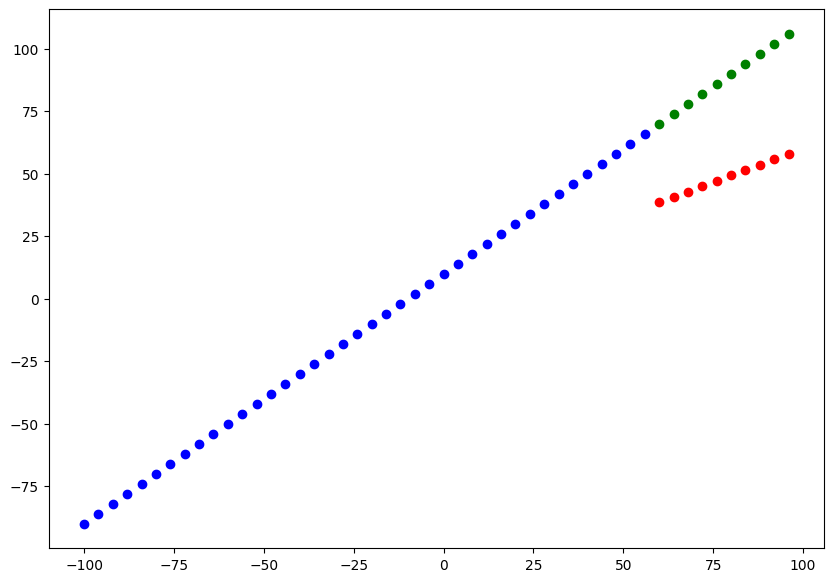

In [49]:
plot_pred(pred = pred3)

In [50]:
mae3 = mae(y_test,pred3)
mse3 = mse(y_test,pred3)
mae3,mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=39.740616>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1607.2971>)

### Comparing results
Now we've got results for 3 similar but slightly different results, let's compare them.

In [51]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae2.numpy(), mse2.numpy()],
                 ["model_3", mae3.numpy(), mse3.numpy()]]

In [52]:
df = pd.DataFrame(model_results,columns = ["model","mae","mse"])
df

,model,mae,mse
0,model_1,164.837799,27691.662109
1,model_2,14.889933,222.801682
2,model_3,39.740616,1607.297119


In [53]:
model1.summary()

Model: "model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (10, 1)                     │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

### Tracking your experiments
One really good habit to get into is tracking your modelling experiments to see which perform better than others.
We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

### Saving our model
Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

1. The SavedModel format (default).
2. The HDF5 format.

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [54]:
#SavedModel format
model2.save("Best_model_SavedModel_format.keras")


In [55]:
#HDF5 format
model2.save("Best_model_SavedModel_format.h5")

### Load the saved model


In [56]:
#SavedModel format
new_model = tf.keras.models.load_model("Best_model_SavedModel_format.keras")
new_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [57]:
#HDF5 format
new_model_h5 = tf.keras.models.load_model("Best_model_SavedModel_format.h5")
new_model_h5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [58]:
load_pred = new_model.predict(tf.expand_dims(X_test,-1))
pred2 = model2.predict(tf.expand_dims(X_test,-1))
load_pred_h5 = new_model_h5.predict(tf.expand_dims(X_test,-1))
pred2 == load_pred,pred2 == load_pred_h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


(array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

In [59]:
mse(y_test,load_pred) == mse(y_test,pred2),mse(y_test,load_pred_h5) == mse(y_test,pred2)

(<tf.Tensor: shape=(), dtype=bool, numpy=True>,
 <tf.Tensor: shape=(), dtype=bool, numpy=True>)

### LARGER EXAMPLE

In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
#read the data
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
#one hot encoding on dataframe
df = pd.get_dummies(df)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [63]:
#Features and labels creation
X = df.drop("charges",axis = 1)
y = df["charges"]
X = X.astype(np.float32)
y = y.astype(np.float32)


In [64]:
#create training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [65]:
#Build a neural network (sort of model2):-

tf.random.set_seed(42)
#1.Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

#3.Fit the model
model.fit(X_train,y_train,epochs = 100,verbose=0)


In [66]:
model.evaluate(tf.expand_dims(X_test,-1),y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8023.0645 - mae: 8023.0645  


[7988.04296875, 7988.04296875]

To better the model:-

1. Add extra layers with more hidden units and use Adam optimizer
2. train for more time (for 200 epochs)
3. my own experiments

In [67]:
#Build another neural network (different from last one):-

tf.random.set_seed(42)
#1.Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2.Compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

#3.Fit the model
model_1.fit(X_train,y_train,epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13257.4307 - mae: 13257.4307
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13116.7754 - mae: 13116.7754  
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12824.7275 - mae: 12824.7275 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12241.2402 - mae: 12241.2402 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11227.3633 - mae: 11227.3633 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9836.0273 - mae: 9836.0273   
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8423.3662 - mae: 8423.3662 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7563.9648 - mae: 7563.9648 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7402.2090 - mae: 7402.2090 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7373.2266 - mae: 7373.2266 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7352.5171 - mae: 7352.5171 
Epoch 12/100
34/34 ━━━━━━━━━━

In [68]:
#Evaluate the model_1
model_1.evaluate(tf.expand_dims(X_test,-1),y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5067.7422 - mae: 5067.7422  


[4917.443359375, 4917.443359375]

In [69]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["mae"]
)

history = model_2.fit(X_train,y_train,epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12635.9707 - mae: 12635.9707
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7546.6318 - mae: 7546.6318 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7222.3354 - mae: 7222.3354 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7017.8838 - mae: 7017.8838 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6751.6875 - mae: 6751.6875 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6415.6831 - mae: 6415.6831 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6258.2534 - mae: 6258.2534 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6131.2695 - mae: 6131.2695
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5990.3599 - mae: 5990.3599 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5818.0864 - mae: 5818.0864 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5565.7695 - mae: 5565.7695 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [70]:
model_2.evaluate(tf.expand_dims(X_test,-1),y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3220.6455 - mae: 3220.6455  


[3160.711669921875, 3160.711669921875]

Text(0.5, 0, 'epochs')

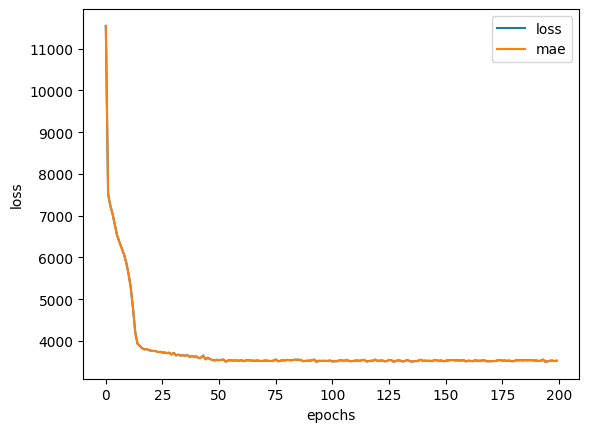

In [71]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [72]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ["mae"]
)

history_3 = model_3.fit(X_train,y_train,epochs = 300)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12569.0371 - mae: 12569.0371
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7538.3296 - mae: 7538.3296 
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7238.9673 - mae: 7238.9673  
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7038.6099 - mae: 7038.6099 
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6779.5913 - mae: 6779.5913 
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6450.7251 - mae: 6450.7251 
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6273.0059 - mae: 6273.0059 
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6146.7959 - mae: 6146.7959 
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6010.3081 - mae: 6010.3081
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5841.1362 - mae: 5841.1362 
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5612.6230 - mae: 5612.6230 
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [73]:
model_3.evaluate(X_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3220.9497 - mae: 3220.9497  


[3160.60498046875, 3160.60498046875]

### Preprocessing data (normalisation and standardization)
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
Feature scaling:
1. Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.
2. Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.

Which one should you use?

With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
#Create a column transformer
ct =make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),# Turns data in range of 0 to 1
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"])
)

#Create X and y
X = df.drop("charges",axis = 1)
y = df["charges"]

#Build our train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

#Fit column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalisation (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [85]:
#What does our data looks like now:-
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [86]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [87]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Our data is normalized and numerical, let's model it.(same as model_2)

In [88]:
tf.random.set_seed(42)

#1.Create a model

ins_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile it

ins_model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)
#3. Fit it

ins_model.fit(X_train_normal,y_train,epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13297.4971 - mae: 13297.4971
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13290.6348 - mae: 13290.6348 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13272.8359 - mae: 13272.8359 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13233.0322 - mae: 13233.0322
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13160.0977 - mae: 13160.0977
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13043.6260 - mae: 13043.6260
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12873.4990 - mae: 12873.4990 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12639.6240 - mae: 12639.6240
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12331.6787 - mae: 12331.6787 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11942.9766 - mae: 11942.9766 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11480.1777 - mae: 11480.1777
Epoch 12/200
34/34 ━━━━━━

In [89]:
ins_model.evaluate(X_test_normal,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3214.0764 - mae: 3214.0764  


[3160.91552734375, 3160.91552734375]

# **done**